In [1]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append('..')

from graph_tool.all import *
import numpy as np
import matplotlib.pyplot as plt

from scripts.generate_network import barabasi_albert
from scripts.hrg import *
from scripts.random_attacks import *
from scripts import visualization as viz

viz.load_matplotlib()
plt = viz.plt
plt.style.use('seaborn-poster')

/usr/lib/python3/dist-packages/graph_tool/draw/cairo_draw.py:32: RuntimeWarning: Error importing cairo. Graph drawing will not work.
  warnings.warn(msg, RuntimeWarning)
/usr/lib/python3/dist-packages/graph_tool/draw/cairo_draw.py:32: RuntimeWarning: Error importing cairo. Graph drawing will not work.
  warnings.warn(msg, RuntimeWarning)
/usr/lib/python3/dist-packages/graph_tool/draw/cairo_draw.py:32: RuntimeWarning: Error importing cairo. Graph drawing will not work.
  warnings.warn(msg, RuntimeWarning)
/usr/lib/python3/dist-packages/graph_tool/all.py:39: RuntimeWarning: Error importing draw module, proceeding nevertheless: No module named 'cairo'
  warnings.warn(msg, RuntimeWarning)


In [2]:
dendrogram = load_dendrogram('../data/community_hrg_large.txt')
print(avg_degree(dendrogram))
g = generate_hrg(dendrogram)

5.999974999999999


In [3]:
vertex_average(g, "total")

(5.993375, 0.008651756403597331)

In [80]:
pos = sfdp_layout(g)

deg = g.degree_property_map("total")
print(deg.a)
deg.a = 4 * (np.sqrt(deg.a) * 0.5 + 0.4)

# graph_draw(g, pos=pos, vertex_size=deg, output="../plots/hrg_test_large.pdf")

[9 6 9 ... 5 2 6]


<VertexPropertyMap object with value type 'vector<double>', for Graph 0x7f292059f670, at 0x7f29208db670>

In [18]:
ps = np.linspace(0, 1, 50)

dendrogram = load_dendrogram('../data/community_hrg.txt')

N = total_size(dendrogram)
k = avg_degree(dendrogram)
print(f'N = {N}, k = {k}')
p_er = k / N
m = round(k / 2)
print(m)
ntimes = 100
type = 'edge'

mean_sizes_ba, std_sizes_ba = simulate_attack_barabasi_albert(N, ps, m=m, ntimes=ntimes, type=type)
save_output(mean_sizes_ba, std_sizes_ba, f'../data/random_attack_edge_BA_N={N}_k={k}_ntimes={ntimes}.csv')

mean_sizes_er, std_sizes_er = simulate_attack_erdos_renyi(N, p_er, ps, ntimes=ntimes, type=type)
save_output(mean_sizes_er, std_sizes_er, f'../data/random_attack_edge_ER_N={N}_k={k}_ntimes={ntimes}.csv')

mean_sizes_hrg, std_sizes_hrg = simulate_attack_hrg('../data/community_hrg.txt', 
                                                    ps, ntimes=ntimes, type=type)
save_output(mean_sizes_hrg, std_sizes_hrg, f'../data/random_attack_edge_HRG_1_N={N}_k={k}_ntimes={ntimes}.csv')

mean_sizes_hrg, std_sizes_hrg = simulate_attack_hrg('../data/not_community_hrg.txt', 
                                                    ps, ntimes=ntimes, type=type)
save_output(mean_sizes_hrg, std_sizes_hrg, f'../data/random_attack_edge_HRG_2_N={N}_k={k}_ntimes={ntimes}.csv')

  0%|          | 0/50 [00:00<?, ?it/s]

N = 8000, k = 5.99975
3


100%|██████████| 50/50 [39:03<00:00, 46.87s/it]


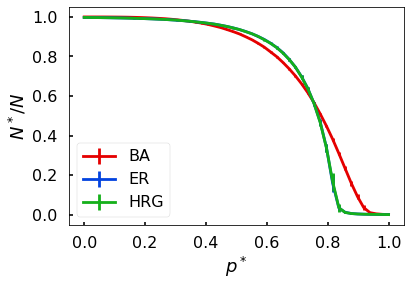

In [19]:
%matplotlib inline
from matplotlib import rc
rc('text', usetex=False) 

plt.errorbar(ps, mean_sizes_ba, yerr=std_sizes_ba, fmt='-', label='BA', color='xkcd:red')
plt.errorbar(ps, mean_sizes_er, yerr=std_sizes_er, fmt='-', label='ER', color='xkcd:blue')
plt.errorbar(ps, mean_sizes_hrg, yerr=std_sizes_hrg, fmt='-', label='HRG', color='xkcd:green')

plt.ylim(-0.05, 1.05)
plt.ylabel('$N^*/N$', fontsize=18)
plt.xlabel('$p^*$', fontsize=18)
plt.legend()
plt.show()

In [ ]:
ps = np.linspace(0, 1, 50)

dendrogram = load_dendrogram('../data/community_hrg_large.txt')

N = total_size(dendrogram)
k = avg_degree(dendrogram)
print(f'N = {N}, k = {k}')
p_er = k / N
m = round(k / 2)
print(m)
ntimes = 100

mean_sizes_ba, std_sizes_ba = simulate_attack_barabasi_albert(N, ps, m=m, ntimes=ntimes, random_attack=False)
save_output(mean_sizes_ba, std_sizes_ba, f'../data/intentional_attack_edge_BA_N={N}_k={k}_ntimes={ntimes}.csv')

mean_sizes_er, std_sizes_er = simulate_attack_erdos_renyi(N, p_er, ps, ntimes=ntimes, random_attack=False)
save_output(mean_sizes_er, std_sizes_er, f'../data/intentional_attack_edge_ER_N={N}_k={k}_ntimes={ntimes}.csv')

mean_sizes_hrg, std_sizes_hrg = simulate_attack_hrg('../data/community_hrg_large.txt', 
                                                    ps, ntimes=ntimes, random_attack=False)
save_output(mean_sizes_hrg, std_sizes_hrg, f'../data/intentional_attack_edge_HRG_1_N={N}_k={k}_ntimes={ntimes}.csv')

mean_sizes_hrg, std_sizes_hrg = simulate_attack_hrg('../data/not_community_hrg_large.txt', 
                                                    ps, ntimes=ntimes, random_attack=False)
save_output(mean_sizes_hrg, std_sizes_hrg, f'../data/intentional_attack_edge_HRG_2_N={N}_k={k}_ntimes={ntimes}.csv')

  0%|          | 0/50 [00:00<?, ?it/s]

N = 80000, k = 5.999974999999999
3


  2%|▏         | 1/50 [00:35<29:09, 35.71s/it]

In [34]:
ps = np.linspace(0, 1, 20)

N = total_size(dendrogram)
k = avg_degree(dendrogram)
print(f'N = {N}, k = {k}')
p_er = k / N
m = round(k / 2)
ntimes = 5

# mean_sizes_ba, std_sizes_ba = simulate_attack_barabasi_albert(N, ps, m=m, random_attack=False, ntimes=ntimes)
# mean_sizes_er, std_sizes_er = simulate_attack_erdos_renyi(N, p_er, ps, random_attack=False, ntimes=ntimes)
# mean_sizes_hrg, std_sizes_hrg = simulate_attack_hrg('../data/not_community_hrg_large.txt', ps, 
#                                                     random_attack=False, ntimes=ntimes)

  5%|▌         | 1/20 [00:00<00:02,  6.50it/s]

N = 8000, k = 5.00075


100%|██████████| 20/20 [00:42<00:00,  2.14s/it]


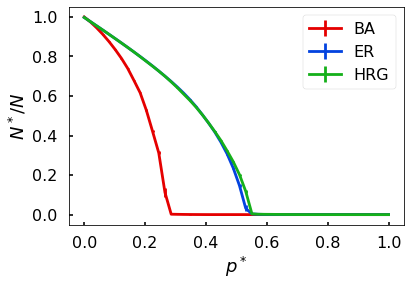

In [13]:
%matplotlib inline
plt.errorbar(ps, mean_sizes_ba, yerr=std_sizes_ba, fmt='-', label='BA', color='xkcd:red')
plt.errorbar(ps, mean_sizes_er, yerr=std_sizes_er, fmt='-', label='ER', color='xkcd:blue')
plt.errorbar(ps, mean_sizes_hrg, yerr=std_sizes_hrg, fmt='-', label='HRG', color='xkcd:green')

plt.ylim(-0.05, 1.05)
plt.ylabel('$N^*/N$', fontsize=18)
plt.xlabel('$p^*$', fontsize=18)
plt.legend()
plt.show()